In [1]:
# import needed packages
import numpy as np
import utilities_visuals as ut
import utilities_simulation as us

import ArgModel as normal_am
import reducedArgModel as reduced_am

In [89]:
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 500,
    "no_of_iterations": 10000,
    # strength of biased processing
    "ß": 4.0,
    # Number of implicitly modelled arguments
    "M": 4,
    # binary variable indicating what data to return at the end of the simulation
    "SPA": False}

measures = {
    "attitude_of_all_agents": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    , "mean_attitude": np.zeros(model_parameters["no_of_iterations"])
    , "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
}

# simulates a model run and saves the returned data for later use
measures = reduced_am.simulate_agent_interaction(model_parameters, measures)


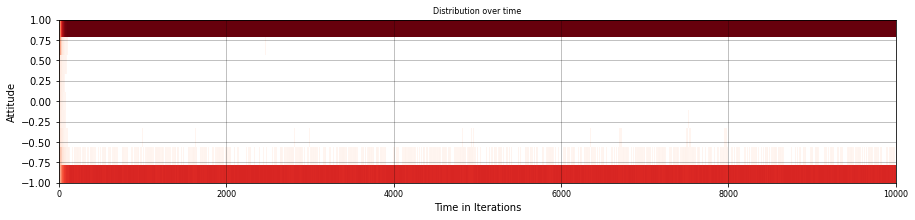

In [90]:
#creates the one look peek for a single simulation
fig = ut.two_d_histogramm_single_simulation(measures["attitude_of_all_agents"], 9, model_parameters["M"])

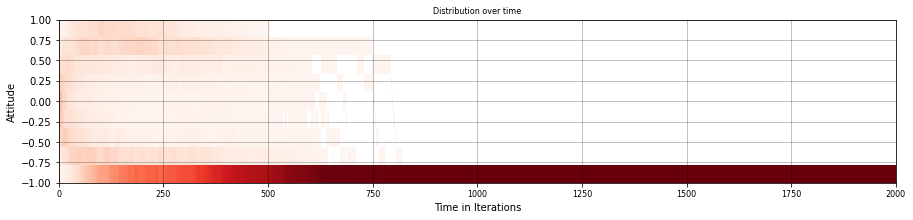

In [88]:
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 500
    , "no_of_iterations": 2000
    # strength of biased processing
    , "ß": 4.0
    # linkage matrix
    , "C": us.create_connection_matrix_symmetrical(no_of_arguments=8, normalised=True)
    # binary variable indicating what data to return at the end of the simulation
    , "SPA": False
    }

measures = {
    "attitude_of_all_agents": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    #, "mean_attitude": np.zeros(model_parameters["no_of_iterations"])
    #, "variance_attitude": np.zeros(model_parameters["no_of_iterations"])

    #takes too long for 1000 agents
    #, "correlation_of_evaluations": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    }
# measures["correlation_evaluations"] = np.zeros(model_parameters["no_of_iterations"])

measures = normal_am.simulate_agent_interaction(model_parameters, measures)

# changes the data type of the variable from list of 2d-arrays to a 3d-array
#matr = ut.rearrange_attitude_list(loal)

fig = ut.two_d_histogramm_single_simulation(measures["attitude_of_all_agents"], 9, model_parameters["C"])

In [87]:
#creates the one look peek for a single simulation
measures

{'attitude_of_all_agents': array([[ 2.50000000e-001,  2.50000000e-001,  2.50000000e-001, ...,
          5.52478797e+227,  5.52478797e+227,  5.52478797e+227],
        [ 0.00000000e+000,  2.50000000e-001,  2.50000000e-001, ...,
          5.52478797e+227,  5.52478797e+227,  5.52478797e+227],
        [ 2.50000000e-001,  2.50000000e-001,  2.50000000e-001, ...,
          5.52478797e+227,  5.52478797e+227,  5.52478797e+227],
        ...,
        [ 2.50000000e-001,  0.00000000e+000,  0.00000000e+000, ...,
          5.52478797e+227,  5.52478797e+227,  5.52478797e+227],
        [-2.50000000e-001, -2.50000000e-001, -2.50000000e-001, ...,
          5.52478797e+227,  5.52478797e+227,  5.52478797e+227],
        [ 0.00000000e+000, -2.50000000e-001, -2.50000000e-001, ...,
          5.52478797e+227,  5.52478797e+227,  5.52478797e+227]])}

In [6]:
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 100
    , "no_of_iterations": 1000
    # strength of biased processing
    , "ß": 3.2
    # linkage matrix
    , "C": us.create_connection_matrix_symmetrical(no_of_arguments=8, normalised=True)
    # binary variable indicating what data to return at the end of the simulation
    , "SPA": True
}

measures = {
    # "attitude_of_all_agents": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    #, "mean_attitude": np.zeros(model_parameters["no_of_iterations"])
     "mean_attitude_END_VALUE": 0
    #, "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
    , "variance_attitude_END_VALUE": 0
    #takes too long for 1000 agents
    #, "correlation_of_evaluations": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
}
# measures["correlation_evaluations"] = np.zeros(model_parameters["no_of_iterations"])

SPA_param = {
    'params_to_iter': np.array(['ß']),
    'sims_per_comb': 5,
    'boundaries': np.array([[0,10]]),
    'no_of_steps': np.array([11])}

measures_from_SPA = normal_am.systematic_parameter_analysis(SPA_param, model_parameters, measures)

[0.]
[1.]
[2.]
[3.]
[4.]
[5.]
[6.]
[7.]
[8.]
[9.]
[10.]


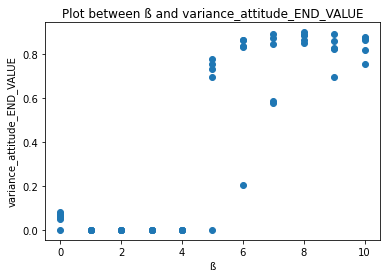

In [7]:
ut.xy_plot_measurement('ß', 'variance_attitude_END_VALUE', measures_from_SPA)